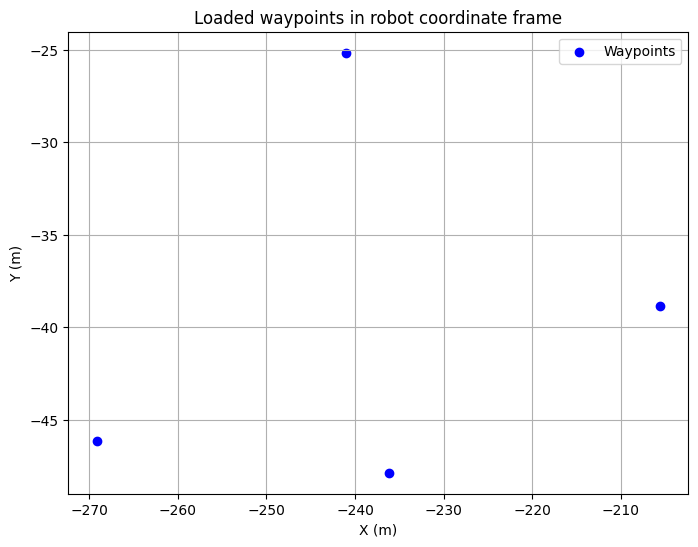

In [ ]:
import json
import math
import matplotlib.pyplot as plt
import numpy as np

class WaypointManager:
    def __init__(self):
        self.robot_inital_geo = (47.740114, 10.322442)
        self.waypoint_list_geo = []
        self.waypoint_list_robot_frame = []

    def load_waypoints_from_file(self, file_path):
        try:
            with open(file_path, 'r') as f:
                data = json.load(f)
                features = data['features']
                self.waypoint_list_geo = []
                for feature in features:
                    coords = feature['geometry']['coordinates']

                    waypoint = {
                        'latitude': coords[1],
                        'longitude': coords[0],
                        'elevation': coords[2]
                    }
                    self.waypoint_list_geo.append(waypoint)

                return True
        except Exception as e:
            print(f"Failed to load waypoints: {str(e)}")
            return False

    def convert_waypoints_to_robot_frame(self):
        R = 6371e3  # Radius of the Earth in meters
        initial_latitude_radians = math.radians(self.robot_inital_geo[0])
        initial_longitude_radians = math.radians(self.robot_inital_geo[1])

        self.waypoint_list_robot_frame = []
        for waypoint in self.waypoint_list_geo:
            waypoint_latitude_radians = math.radians(waypoint['latitude'])
            waypoint_longitude_radians = math.radians(waypoint['longitude'])

            X = R * (waypoint_longitude_radians - initial_longitude_radians) * math.cos(initial_longitude_radians)
            Y = R * (waypoint_latitude_radians - initial_latitude_radians)

            self.waypoint_list_robot_frame.append((X, Y))

    def plot_waypoints(self):
        x = [point[0] for point in self.waypoint_list_robot_frame]
        y = [point[1] for point in self.waypoint_list_robot_frame]

        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, color='blue', label='Waypoints')
        plt.xlabel('X (m)')
        plt.ylabel('Y (m)')
        plt.title('Loaded waypoints in robot coordinate frame')
        plt.grid(True)
        plt.legend()
        plt.show()

def main():
    waypoint_manager = WaypointManager()

    file_path = "waypoints.geojson"
    if waypoint_manager.load_waypoints_from_file(file_path):
        waypoint_manager.convert_waypoints_to_robot_frame()
        waypoint_manager.plot_waypoints()
    else:
        print("No waypoints loaded")

if __name__ == "__main__":
    main()
